In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.float_format = '{:.2f}'.format

### Getting the data ###

In [2]:
#importing house sales data
sales = pd.read_csv('data/sales.csv')
sales.head()

,date,price,house_id,id
0,2014-10-13,221900.00,7129300520,1
1,2014-12-09,538000.00,6414100192,2
2,2015-02-25,180000.00,5631500400,3
3,2014-12-09,604000.00,2487200875,4
4,2015-02-18,510000.00,1954400510,5


In [3]:
# importing details of house sales data
details = pd.read_csv('data/details.csv')
details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.00,3.00,2400.00,9373.00,2.00,NaN,0.00,3,7,2400.00,0.00,1991,0.00,98002,47.33,-122.21,2060.00,7316.00
1,100100050,3.00,1.00,1320.00,11090.00,1.00,0.00,0.00,3,7,1320.00,0.00,1955,0.00,98155,47.77,-122.30,1320.00,8319.00
2,1001200035,3.00,1.00,1350.00,7973.00,1.50,NaN,0.00,3,7,1350.00,0.00,1954,0.00,98188,47.43,-122.29,1310.00,7491.00
3,1001200050,4.00,1.50,1260.00,7248.00,1.50,NaN,0.00,5,7,1260.00,0.00,1955,NaN,98188,47.43,-122.29,1300.00,7732.00
4,1003000175,3.00,1.00,980.00,7606.00,1.00,0.00,0.00,3,7,980.00,0.00,1954,0.00,98188,47.44,-122.29,980.00,8125.00


In [4]:
# id in details corresponds to house_id in sales, so the column name 'id' in details needs to be changed

details = details.rename({'id':'house_id'}, axis=1)
details.columns

Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# merging sales and details on house_id

house_data = pd.merge(sales, details, on=['house_id'], how='left' )
house_data.head()

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.00,7129300520,1,3.00,1.00,1180.00,5650.00,1.00,NaN,...,7,1180.00,0.00,1955,0.00,98178,47.51,-122.26,1340.00,5650.00
1,2014-12-09,538000.00,6414100192,2,3.00,2.25,2570.00,7242.00,2.00,0.00,...,7,2170.00,400.00,1951,19910.00,98125,47.72,-122.32,1690.00,7639.00
2,2015-02-25,180000.00,5631500400,3,2.00,1.00,770.00,10000.00,1.00,0.00,...,6,770.00,0.00,1933,NaN,98028,47.74,-122.23,2720.00,8062.00
3,2014-12-09,604000.00,2487200875,4,4.00,3.00,1960.00,5000.00,1.00,0.00,...,7,1050.00,910.00,1965,0.00,98136,47.52,-122.39,1360.00,5000.00
4,2015-02-18,510000.00,1954400510,5,3.00,2.00,1680.00,8080.00,1.00,0.00,...,8,1680.00,0.00,1987,0.00,98074,47.62,-122.05,1800.00,7503.00


### Getting to know the data ###

In [9]:
house_data.shape

(21597, 22)

In [10]:
house_data.columns

Index(['date', 'price', 'house_id', 'id', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [12]:
# type of first date entry
type(house_data['date'][0])

str

In [13]:
house_data.date

0        2014-10-13
1        2014-12-09
2        2015-02-25
3        2014-12-09
4        2015-02-18
            ...    
21592    2014-05-21
21593    2015-02-23
21594    2014-06-23
21595    2015-01-16
21596    2014-10-15
Name: date, Length: 21597, dtype: object

In [14]:
# the date columns is in string format, it needs to be converted to datetime with formate %Y/%m/%d
house_data['date'] = pd.to_datetime(house_data['date'], format='%Y-%m-%d')

In [15]:
# checking type of first date entry
type(house_data['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
# checking for missing values
house_data.isna().sum()

date                0
price               0
house_id            0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
# import missingno for visualizing missing values
import missingno as msno

<Axes: >

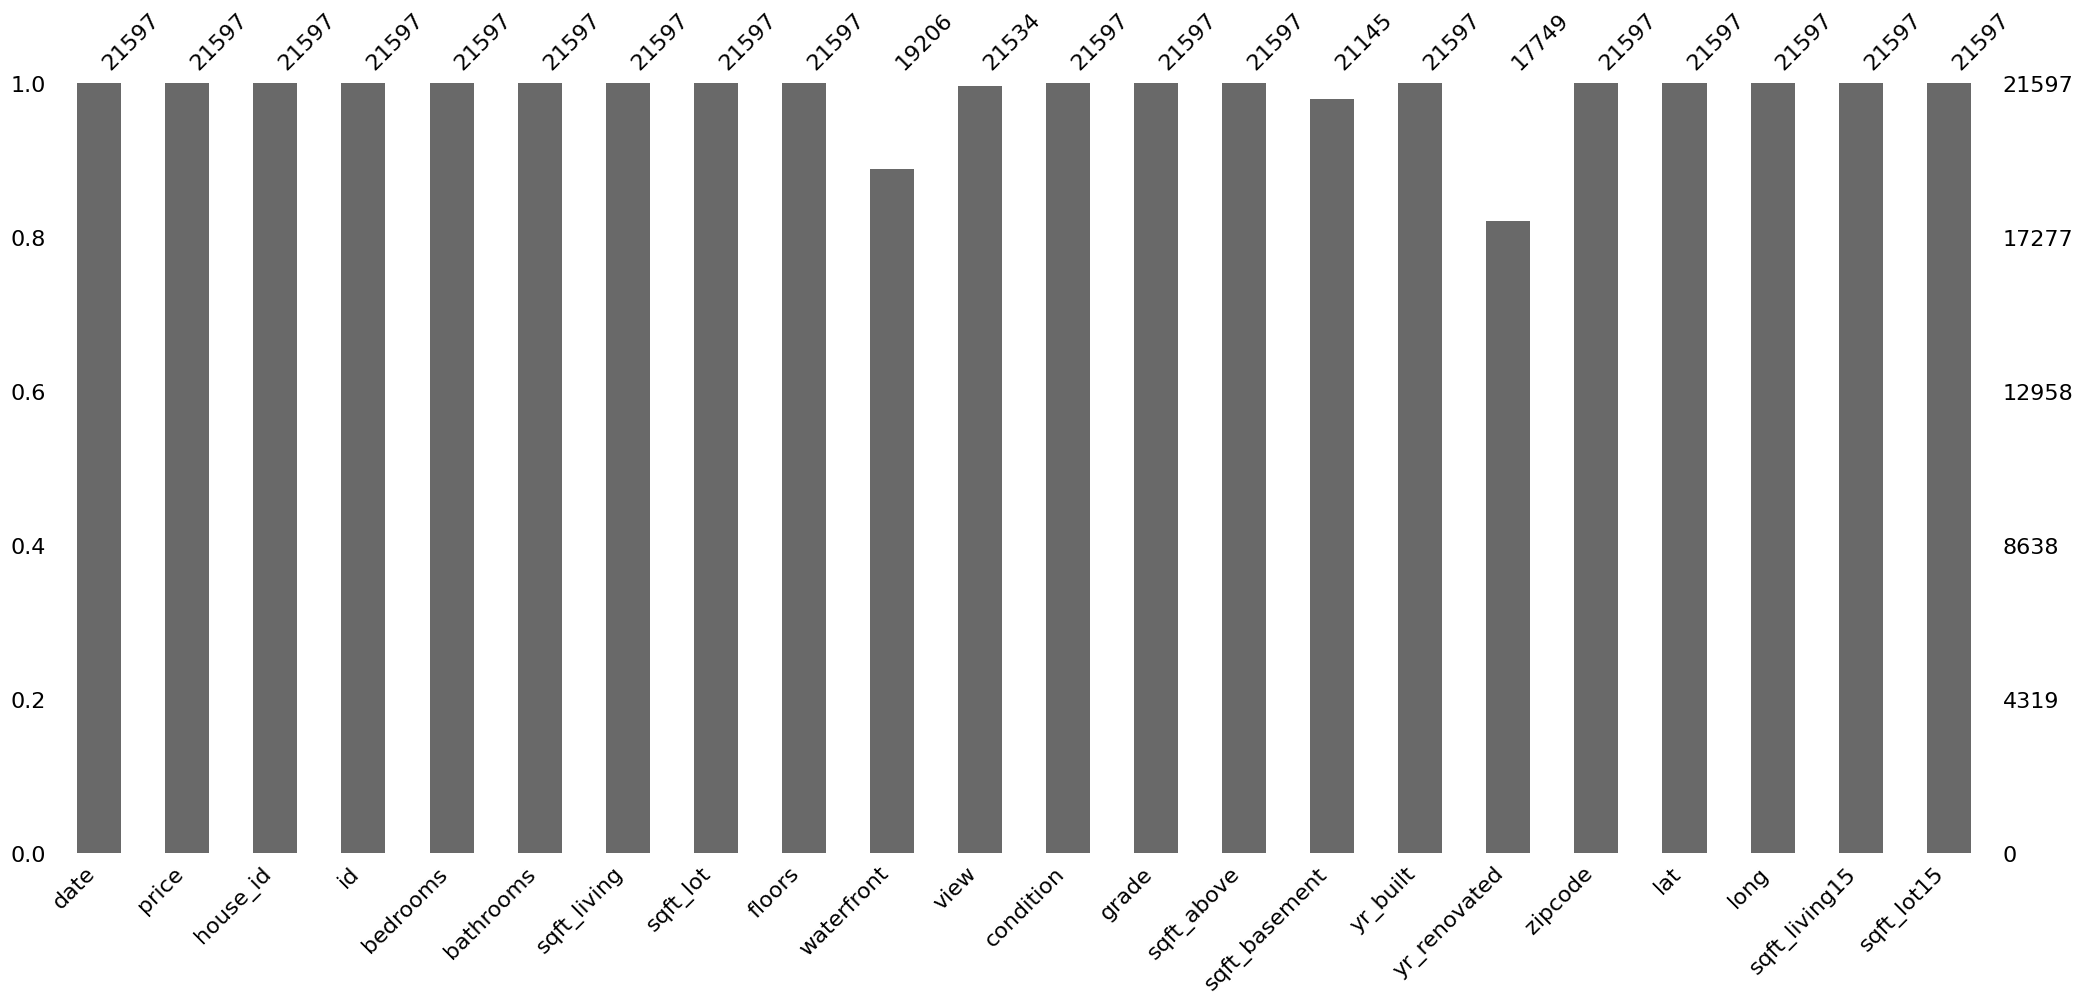

In [18]:
# plotting percentage of missing values per column
msno.bar(house_data)

In [19]:
# Cheking for rows with same id
duplicates = house_data[house_data.duplicated(subset=['id'])]
print(len(duplicates))

0


### Business case ###
#### Stakeholder requirements: ####
* 3 - 6 bedrooms
* 2 bathrooms
* with a basement (preferred)
* in a condition that allows to move in immediately
* in a nice environment
* below the median price

#### Defining the dataframe ####

In [20]:
#keeping only relevant columns
house_data_reduced = house_data.drop(["sqft_lot", "floors", "sqft_lot15", "waterfront", "yr_built", "view", "grade", "yr_renovated", ], axis=1).copy()

In [21]:
house_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   id             21597 non-null  int64         
 4   bedrooms       21597 non-null  float64       
 5   bathrooms      21597 non-null  float64       
 6   sqft_living    21597 non-null  float64       
 7   condition      21597 non-null  int64         
 8   sqft_above     21597 non-null  float64       
 9   sqft_basement  21145 non-null  float64       
 10  zipcode        21597 non-null  int64         
 11  lat            21597 non-null  float64       
 12  long           21597 non-null  float64       
 13  sqft_living15  21597 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(4)
memory usage: 2.3 MB


In [39]:
# sqft_basement has missing values, we will replace them with 0


house_data_reduced['sqft_basement'] = house_data_reduced['sqft_basement'].fillna(0)


In [40]:
print(house_data_reduced['sqft_basement'].isna().sum())

0


#### Visualizing the distribution of numberic columns ####

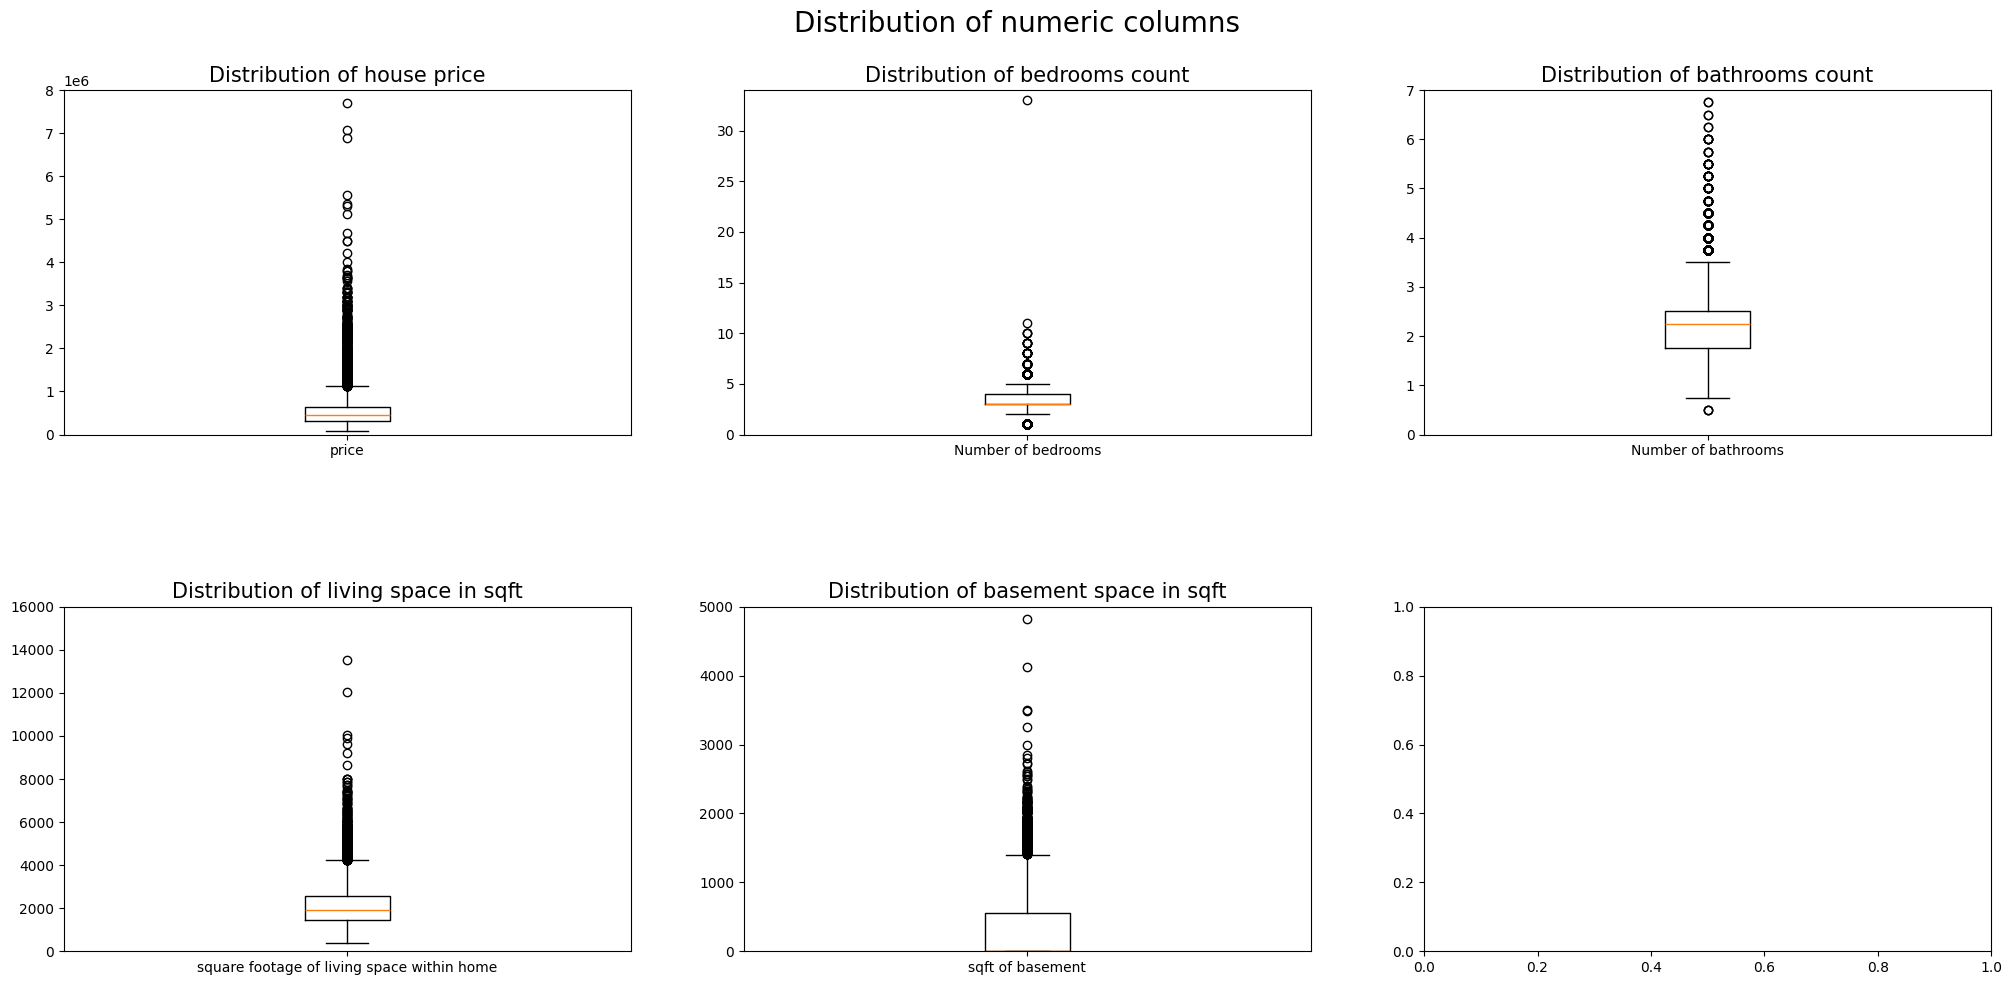

In [42]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = house_data_reduced['price']) 
ax[0][0].set_xticklabels(labels=["price"]) 
ax[0][0].set_ylim(0,8000000) 
ax[0][0].set_title("Distribution of house price", fontsize = 15);

ax[0][1].boxplot(x = house_data_reduced['bedrooms'])
ax[0][1].set_xticklabels(labels=["Number of bedrooms"])
ax[0][1].set_ylim(0,34)
ax[0][1].set_title("Distribution of bedrooms count", fontsize = 15);

ax[0][2].boxplot(x = house_data_reduced['bathrooms'])
ax[0][2].set_xticklabels(labels=["Number of bathrooms"])
ax[0][2].set_ylim(0,7)
ax[0][2].set_title("Distribution of bathrooms count", fontsize = 15);

ax[1][0].boxplot(x = house_data_reduced['sqft_living'])
ax[1][0].set_xticklabels(labels=["square footage of living space within home"])
ax[1][0].set_ylim(0,16000)
ax[1][0].set_title("Distribution of living space in sqft", fontsize = 15);
                              
ax[1][1].boxplot(x = house_data_reduced['sqft_basement'])
ax[1][1].set_xticklabels(labels=["sqft of basement"])
ax[1][1].set_ylim(0,5000)
ax[1][1].set_title("Distribution of basement space in sqft", fontsize = 15);

plt.subplots_adjust(hspace=0.5, wspace=0.2, top=0.9)
plt.show();
#fig.delaxes(ax[1][2]);

In [ ]:
# checking the distribution of house price, which is skewed to the right
house_data['price'].describe()

count     21597.00
mean     540296.57
std      367368.14
min       78000.00
25%      322000.00
50%      450000.00
75%      645000.00
max     7700000.00
Name: price, dtype: float64

In [46]:
# rounding price to 2 decimal places
house_data_reduced['price'] = house_data_reduced['price'].round(2)



In [47]:
# highly skewed price data
house_data_reduced['price'].skew()

np.float64(4.035636014119057)

<Axes: >

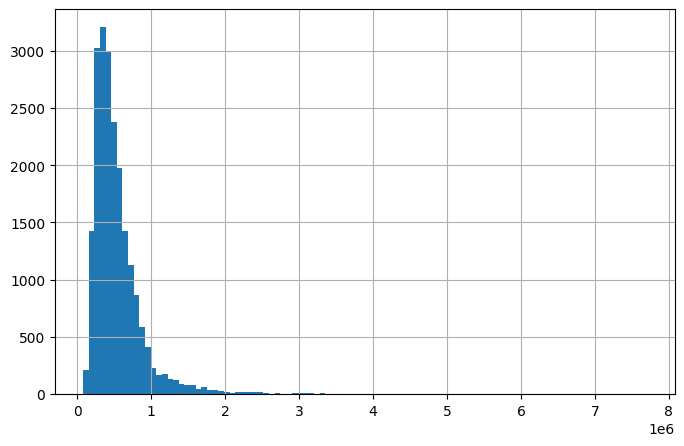

In [48]:
house_data_reduced['price'].hist(bins=100)

Skewness after log transformation: 0.4352928240201408


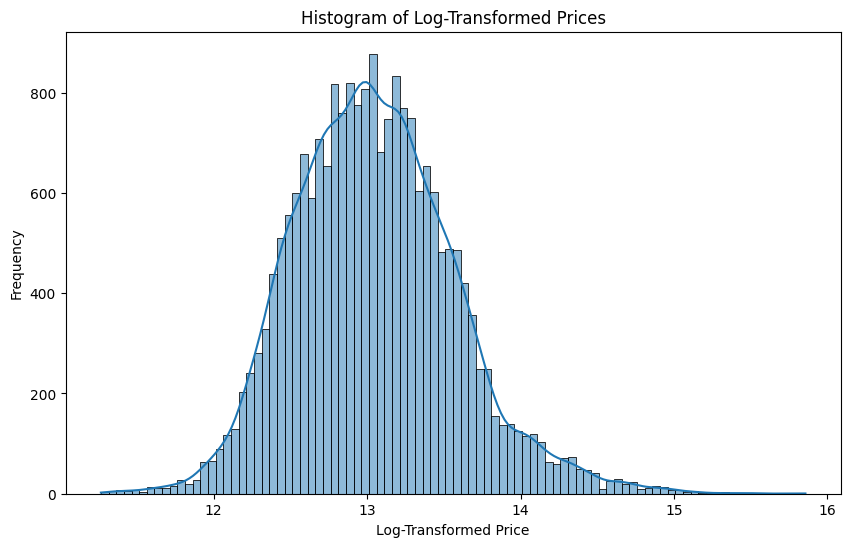

In [49]:
# logging price to reduce skewness
import numpy as np

# Log transformation
house_data_reduced['price_log'] = np.log(house_data_reduced['price'])

# Check the skewness after transformation
print("Skewness after log transformation:", house_data_reduced['price_log'].skew())

# Plot the histogram to visualize the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(house_data_reduced['price_log'], kde=True)
plt.title('Histogram of Log-Transformed Prices')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Frequency')
plt.show()